In [ ]:
!pip install tensorflow
import keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 755.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 110.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.8 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:82: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
pip install numpy pandas matplotlib seaborn scikit-learn tensorflow

In [ ]:
# Basic libraries
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning / Deep Learning
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Data splitting
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
print(X_train.shape)
print(X_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)


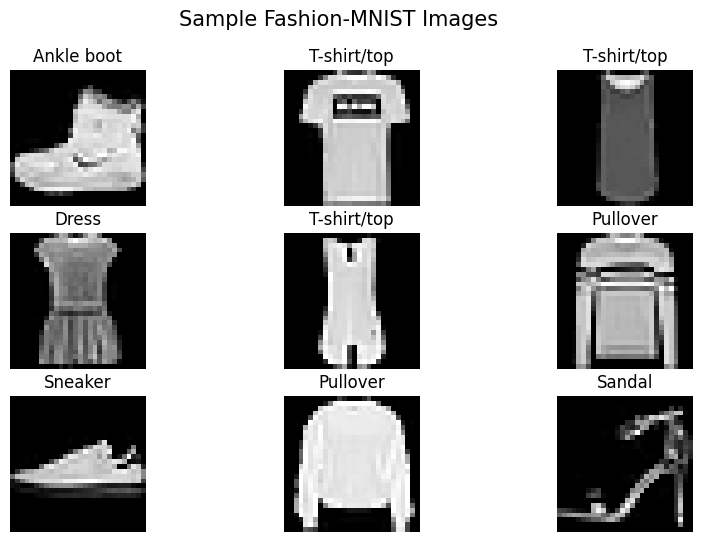

In [ ]:
# Label names for clarity
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display a few random training images
plt.figure(figsize=(10, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.suptitle("Sample Fashion-MNIST Images", fontsize=15)
plt.show()


/tmp/ipython-input-2402276464.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='cool')


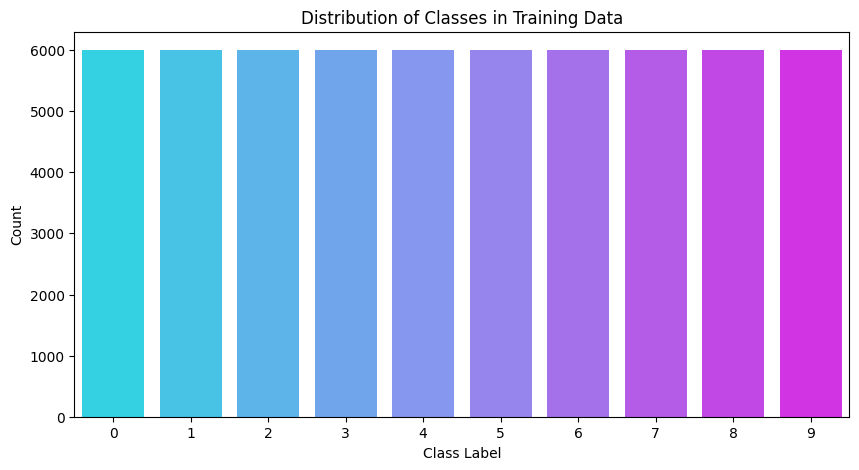

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train, palette='cool')
plt.title("Distribution of Classes in Training Data")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

In [ ]:
X_train=X_train/255.0
X_test=X_test/255.0

In [ ]:

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
model_dense=Sequential([Flatten(input_shape=(28,28,1)),
                        Dense(256,activation='relu'),
                        Dropout(0.3),
                        Dense((128),activation='relu'),
                        Dropout(0.3),
                        Dense(64,activation='relu'),
                        Dropout(0.3),
                        Dense(10,activation='softmax')
                        ])


model_dense.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_dense.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 728,288 (2.78 MB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 485,526 (1.85 MB)

In [ ]:
history=model_dense.fit(X_train,y_train,
                        validation_split=0.2,
                        epochs=10,
                        batch_size=(64),
                        verbose=1)

test_dense_loss, test_dense_acc = model_dense.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy (Dense NN): {test_dense_acc:.4f}")

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8803 - loss: 0.3352 - val_accuracy: 0.8815 - val_loss: 0.3314
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8822 - loss: 0.3294 - val_accuracy: 0.8848 - val_loss: 0.3191
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8848 - loss: 0.3211 - val_accuracy: 0.8770 - val_loss: 0.3247
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8854 - loss: 0.3116 - val_accuracy: 0.8846 - val_loss: 0.3278
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8867 - loss: 0.3122 - val_accuracy: 0.8884 - val_loss: 0.3144
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8882 - loss: 0.3068 - val_accuracy: 0.8829 - val_loss: 0.3277
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8911 - loss: 0.2967 - val_accuracy: 0.8863 - val_loss: 0.3122
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8943 - loss: 0.2919 - val_accuracy: 0.

In [ ]:
display(f"Test accuracy (Dense NN): {test_dense_acc:.4f}")

'Test accuracy (Dense NN): 0.8811'

In [ ]:
model_cnn=Sequential([Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(28,28,1)),
                      MaxPooling2D((2,2)),

                      Conv2D(64,(3,3),padding='same',activation='relu'),
                      MaxPooling2D((2,2)),

                      Flatten(),
                      Dropout(0.3),
                      Dense(128,activation='relu'),
                      Dense(10,activation='softmax')
                      ])

model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_history=model_cnn.fit(X_train,
                          y_train,
                          validation_split=0.2,
                          epochs=10,
                          batch_size=128,
                          verbose=1
                          )
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy (Dense NN): {test_acc:.4f}")

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.9024 - loss: 0.2661 - val_accuracy: 0.9078 - val_loss: 0.2527
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.9107 - loss: 0.2435 - val_accuracy: 0.9148 - val_loss: 0.2357
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9187 - loss: 0.2240 - val_accuracy: 0.9088 - val_loss: 0.2446
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.9245 - loss: 0.2067 - val_accuracy: 0.9196 - val_loss: 0.2263
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.9301 - loss: 0.1833 - val_accuracy: 0.9180 - val_loss: 0.2215
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9347 - loss: 0.1775 - val_accuracy: 0.9191 - val_loss: 0.2248
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.9386 - loss: 0.1624 - val_accuracy: 0.9221 - val_loss: 0.2165
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.9444 - loss: 0.1503 - 

In [ ]:
results=pd.DataFrame({
    'Model':['Dense NN','CNN'],
    'Test Accuracy':[test_dense_acc,test_acc],
    'Test Loss':[test_dense_loss,test_loss]
})
display(results)

,Model,Test Accuracy,Test Loss
0,Dense NN,0.8811,0.347110
1,CNN,0.9223,0.222722


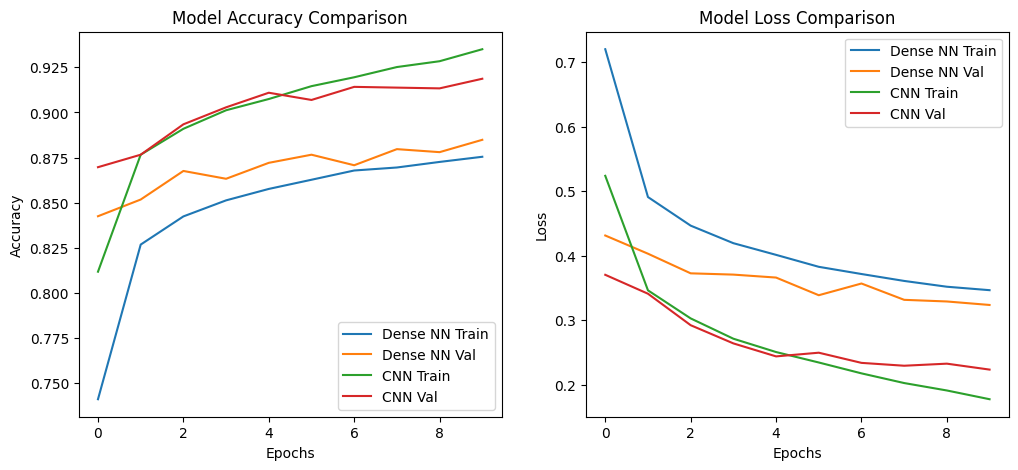

In [ ]:
import matplotlib.pyplot as plt

def plot_history_comparison(history1, history2, title1="Dense NN", title2="CNN"):
    plt.figure(figsize=(12,5))

    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(history1.history['accuracy'], label=f'{title1} Train')
    plt.plot(history1.history['val_accuracy'], label=f'{title1} Val')
    plt.plot(history2.history['accuracy'], label=f'{title2} Train')
    plt.plot(history2.history['val_accuracy'], label=f'{title2} Val')
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1,2,2)
    plt.plot(history1.history['loss'], label=f'{title1} Train')
    plt.plot(history1.history['val_loss'], label=f'{title1} Val')
    plt.plot(history2.history['loss'], label=f'{title2} Train')
    plt.plot(history2.history['val_loss'], label=f'{title2} Val')
    plt.title('Model Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history_comparison(history , cnn_history)


In [ ]:
y_test_labels = np.argmax(y_test, axis=1)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


def predict_fn(index):
  plt.figure(figsize=(6,6))
  plt.imshow(X_test[index].reshape(28,28),cmap='gray')
  plt.axis('off')


  #DENE LAYERS MODEL PREDICTIONS
  dense_pred=np.argmax(model_dense.predict(X_test[index].reshape(1,28,28,1)),axis=1)[0]
  #CNN MODELS PREDICTIONS
  cnn_pred=np.argmax(model_cnn.predict(X_test[index].reshape(1,28,28,1)),axis=1)[0]

  actual=(y_test_labels[index])

  plt.title(f"Actual: {class_names[actual]}\nDense: {class_names[dense_pred]} | CNN: {class_names[cnn_pred]}")
  plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


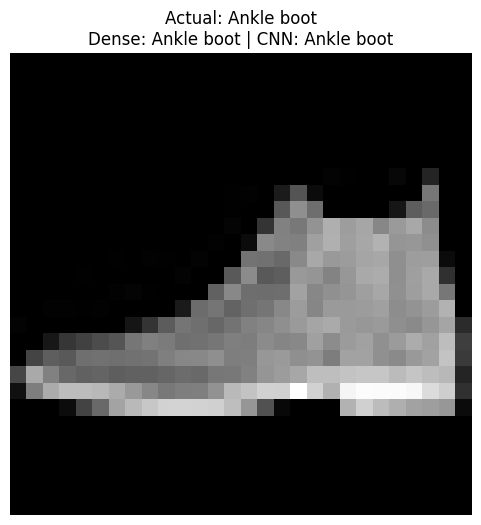

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


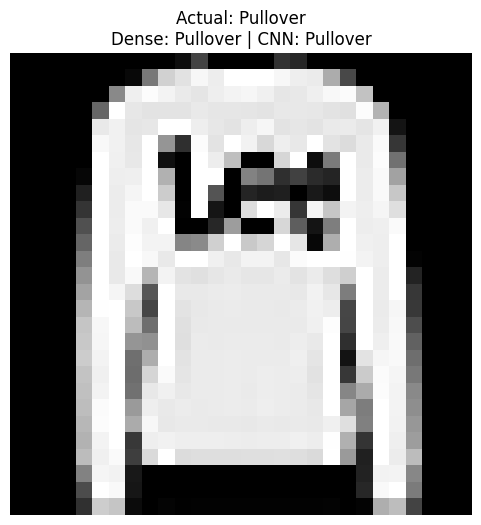

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


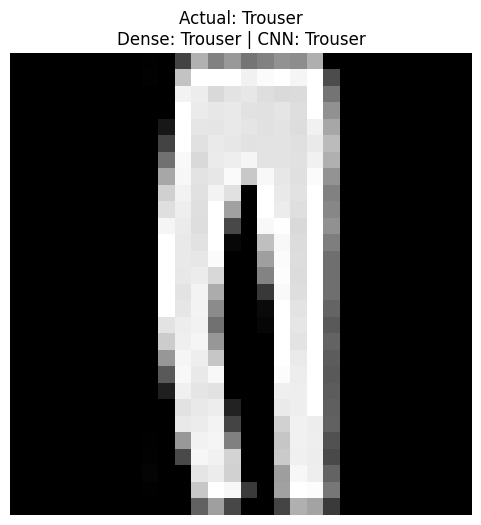

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


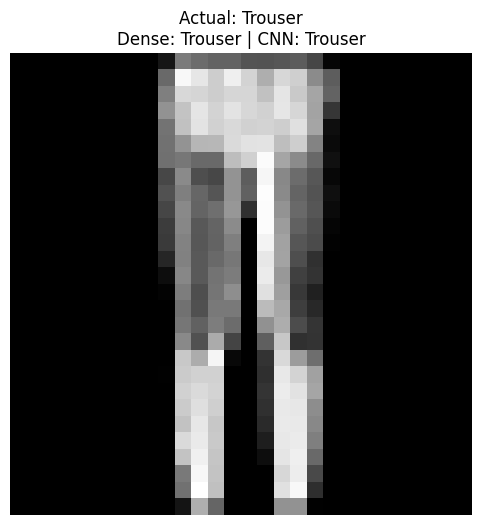

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


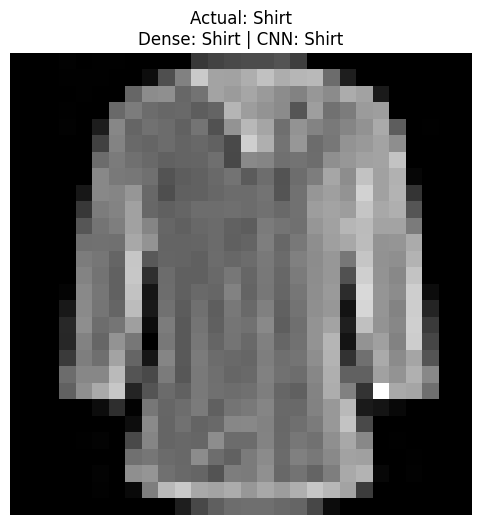

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


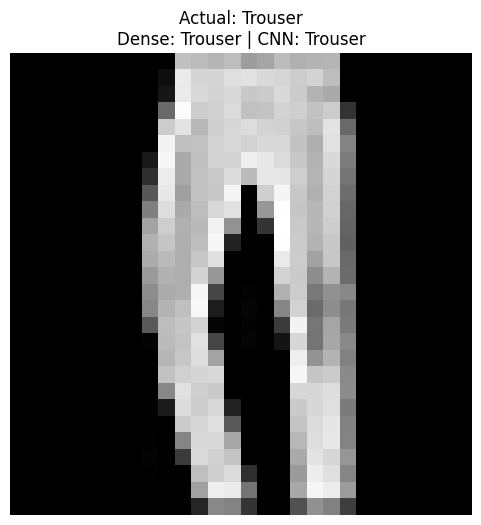

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


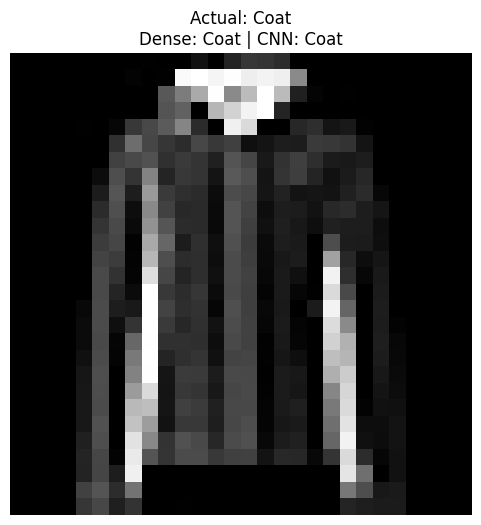

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


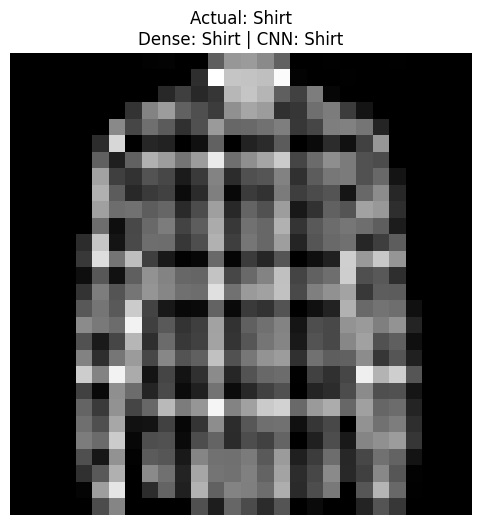

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


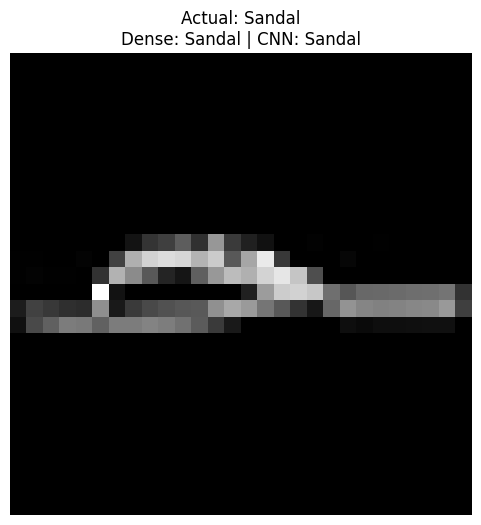

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


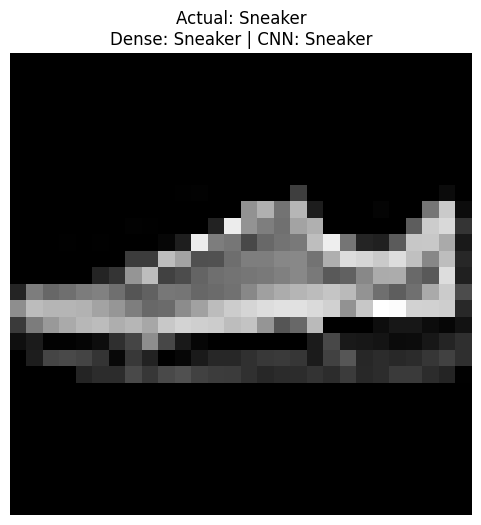

In [ ]:
images=X_test[:10]
#labels=y_test_labels[:5]
for i in range(0,len(images)):
  i=int(i)

  predict_fn(i)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


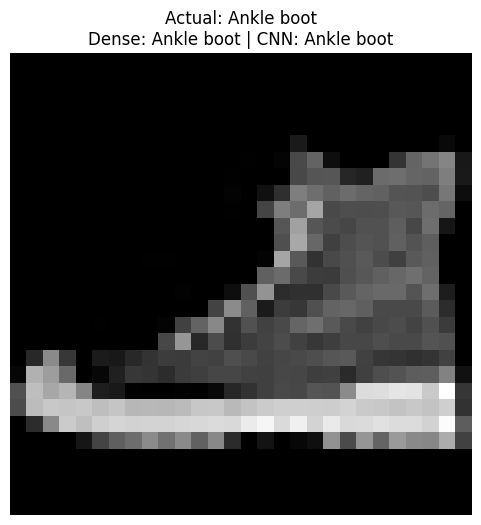

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


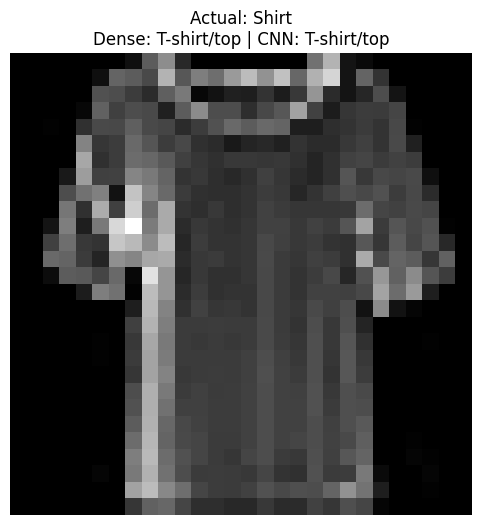

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


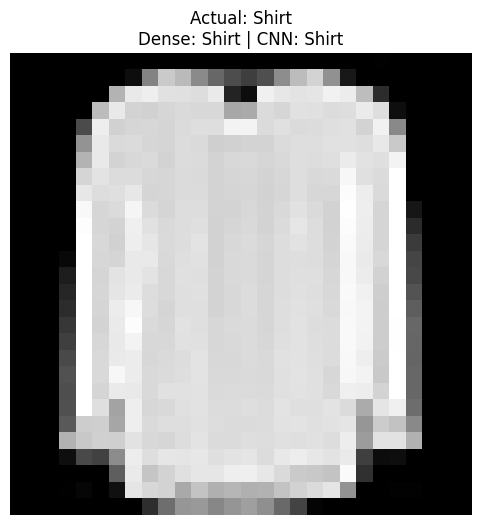

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


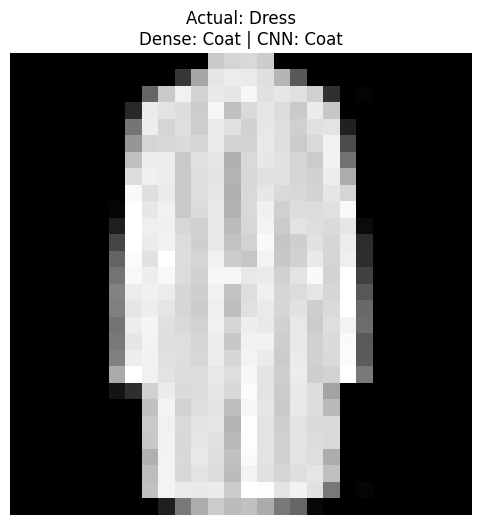

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


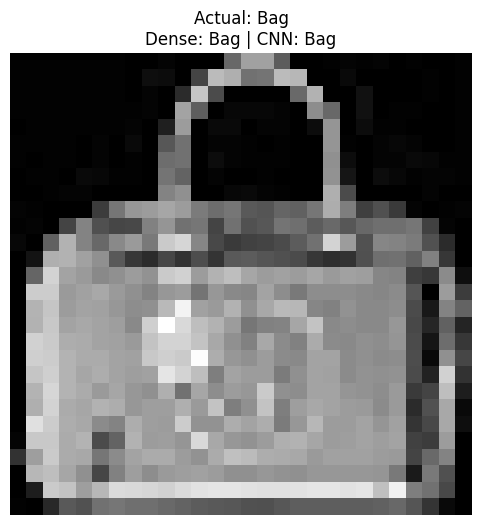

In [ ]:
for i in np.random.randint(0,len(X_test),5):
  i=int(i)
  predict_fn(i)